# The Impacts of COVID-19 on Ottawa Citizens

### Authors:

| Student     | Department                                     | University          | Location       | Contact                      |
|-------------|------------------------------------------------|---------------------|----------------|------------------------------|
| Yikun Yin   | Department of Electrical Engineering           | Carleton University | Ottawa, Canada | yikunyin@cmail.carleton.ca   |
| Yihao Wang  | Department of Electrical Engineering           | Carleton University | Ottawa, Canada | yihaowang@cmail.carleton.ca  |
| Henggong Qu | Department of Electrical Engineering           | Carleton University | Ottawa, Canada | Henggongqu@cmail.carleton.ca |
| David Neale | Department of Systems and Computer Engineering | Carleton University | Ottawa, Canada | davidneale@cmail.carleton.ca |


Initial setup cells to download all the necessary libraries

In [1]:
import csv
from pathlib import Path
import numpy as np
import xlrd
import datetime
from datetime import datetime
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Reading in the data


1.   Reading the raw .csv data files




In [2]:
#read data
df_R_raw=pd.read_csv('Dataset_R.csv').set_index('Date')
df_CC_raw = pd.read_csv('Dataset_CC.csv').set_index('Date')
df_ER = pd.read_csv('Dataset_ER.csv').set_index('Date')
df_UR = pd.read_csv('Dataset_UR.csv').set_index('Date')
df_HI = pd.read_csv('Dataset_HI.csv').set_index('Date')

## Initial cleaning of the data


*   Formatting dates for usability
*   Resampling time steps for Reproduction number (R) data and Confirmed Cases (CC) data
*   Changing units for Employement Rate data and Unemployement Rate   



In [3]:

df_R_raw.index = pd.to_datetime(df_R_raw.index,format = '%d/%m/%Y')
df_CC_raw.index = pd.to_datetime(df_CC_raw.index,format = '%d/%m/%Y')
df_ER.index = pd.to_datetime(df_ER.index)
df_UR.index = pd.to_datetime(df_UR.index)
df_HI.index = pd.to_datetime(df_HI.index)
#resampling time step for R and CC (from daily to monthly)
df_R = df_R_raw.resample('MS').mean()
df_CC = df_CC_raw.resample('MS').mean()


#change the unit of percentage for ER and UR
df_ER['ER']=df_ER['ER']/100.0
df_UR['UR']=df_UR['UR']/100.0

## Continued cleaning of the data

1.   Resampling the data to one dataframe
2.   Standardizing the data



In [4]:
df_raw=df_R.copy()
df=df_raw.copy()
df_raw['CC']=df_CC['CC']
df_raw['ER']=df_ER['ER']
df_raw['UR']=df_UR['UR']
df_raw['HI']=df_HI['HI']
print('raw data')
print(df_raw)
scaler = StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df_raw))
df.columns=df_raw.columns.copy()
df.index=df_raw.index.copy()
print('raw data after standardlization')
print(df)
df.to_csv('Dataset after standardlization.csv')

raw data
                   R           CC        ER        UR        HI
Date                                                           
2020-01-01  0.000000     0.000000  0.564778  0.049667  5.911658
2020-02-01  0.000000     2.550000  0.565111  0.053111  5.901801
2020-03-01  1.504169   186.064516  0.529667  0.077778  5.962687
2020-04-01  1.127160   957.966667  0.482889  0.112778  5.952729
2020-05-01  0.797084  1814.225806  0.484889  0.136556  5.879738
2020-06-01  0.936288  2057.266667  0.514556  0.117222  5.764848
2020-07-01  1.225692  2329.741935  0.523111  0.115556  5.716879
2020-08-01  1.018412  2803.258065  0.534667  0.114778  5.666668
2020-09-01  1.234898  3843.133333  0.543333  0.091333  5.597607
2020-10-01  0.969694  6248.451613  0.545444  0.088000  6.215875
2020-11-01  0.925326  8062.466667  0.547889  0.083000  6.226004
2020-12-01  1.110781  9454.935484  0.545000  0.087000  6.256879
raw data after standardlization
                   R        CC        ER        UR        HI
Da

## Descriptive Statistics

In [5]:
print('Descriptive Statistics')
print(df.describe().T)
df.describe().T.to_csv('descriptive statistics.csv')
df_raw.describe().T.to_csv(' descriptive statistics before.csv')

Descriptive Statistics
    count          mean       std  ...       50%       75%       max
R    12.0  4.672189e-16  1.044466  ...  0.204061  0.561998  1.361596
CC   12.0  0.000000e+00  1.044466  ... -0.313180  0.426412  2.072693
ER   12.0 -5.088522e-16  1.044466  ...  0.280982  0.555480  1.296841
UR   12.0  5.273559e-16  1.044466  ... -0.166909  0.831258  1.682603
HI   12.0 -3.330669e-16  1.044466  ... -0.068253  0.497588  1.593149

[5 rows x 8 columns]


## Data Visualization

time series plots


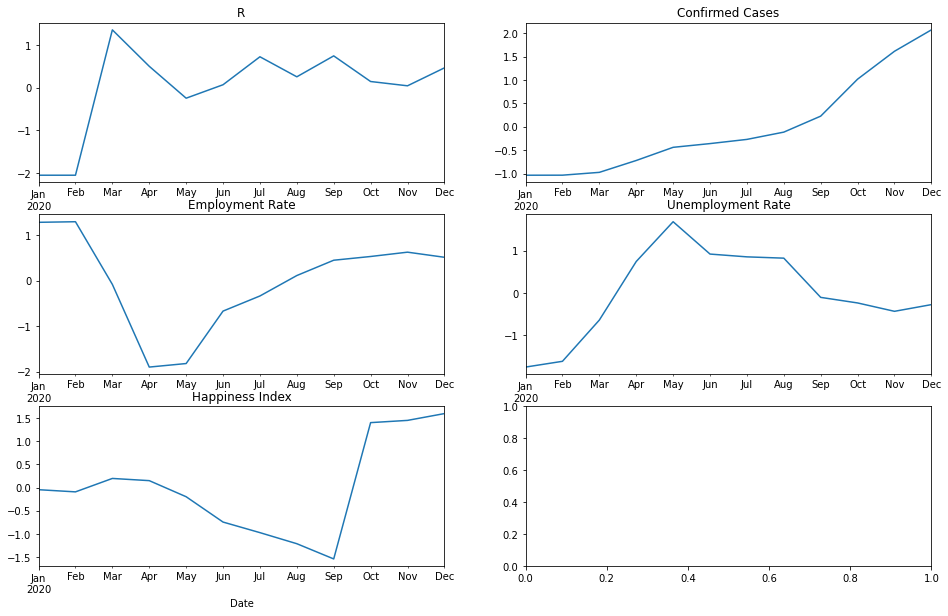

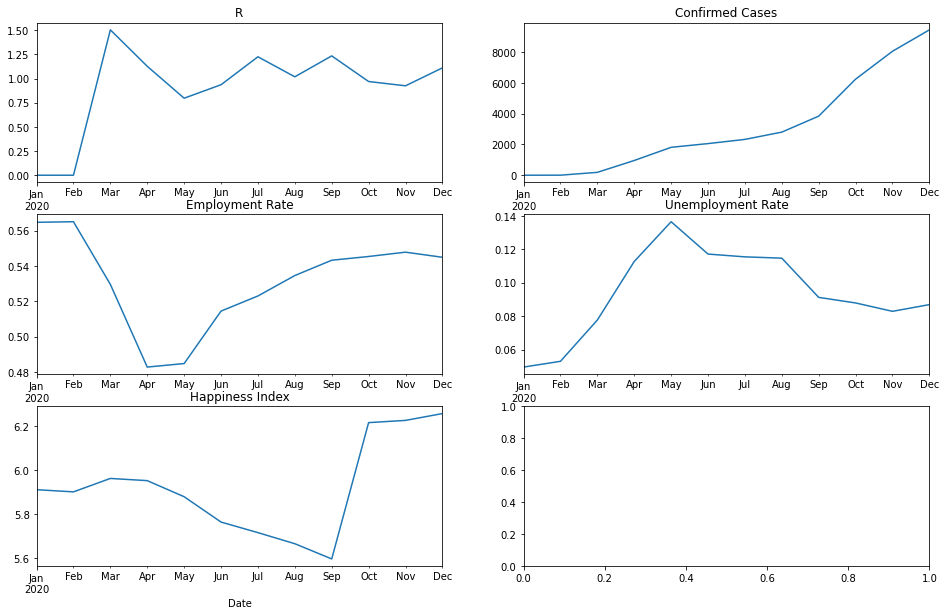

In [6]:
print('time series plots')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
df['R'].plot(ax=axes[0,0]); axes[0,0].set_title('R')
df['CC'].plot(ax=axes[0,1]); axes[0,1].set_title('Confirmed Cases')
df['ER'].plot(ax=axes[1,0]); axes[1,0].set_title('Employment Rate')
df['UR'].plot(ax=axes[1,1]); axes[1,1].set_title('Unemployment Rate')
df['HI'].plot(ax=axes[2,0]); axes[2,0].set_title('Happiness Index')
plt.savefig('time series plot.png')

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
df_raw['R'].plot(ax=axes[0,0]); axes[0,0].set_title('R')
df_raw['CC'].plot(ax=axes[0,1]); axes[0,1].set_title('Confirmed Cases')
df_raw['ER'].plot(ax=axes[1,0]); axes[1,0].set_title('Employment Rate')
df_raw['UR'].plot(ax=axes[1,1]); axes[1,1].set_title('Unemployment Rate')
df_raw['HI'].plot(ax=axes[2,0]); axes[2,0].set_title('Happiness Index')
plt.savefig('time series plot before.png')

## Continued Analysis of the Data


*   Checking the quality of the dataset
*   Checking the correlation - using a heatmap



quality of the dataset
R     False
CC    False
ER    False
UR    False
HI    False
dtype: bool
check the correlation
           R        CC        ER        UR        HI
R   1.000000  0.315021 -0.458652  0.552314 -0.044120
CC  0.315021  1.000000  0.218359  0.053510  0.608484
ER -0.458652  0.218359  1.000000 -0.845878  0.195658
UR  0.552314  0.053510 -0.845878  1.000000 -0.320676
HI -0.044120  0.608484  0.195658 -0.320676  1.000000


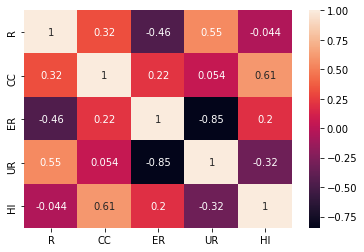

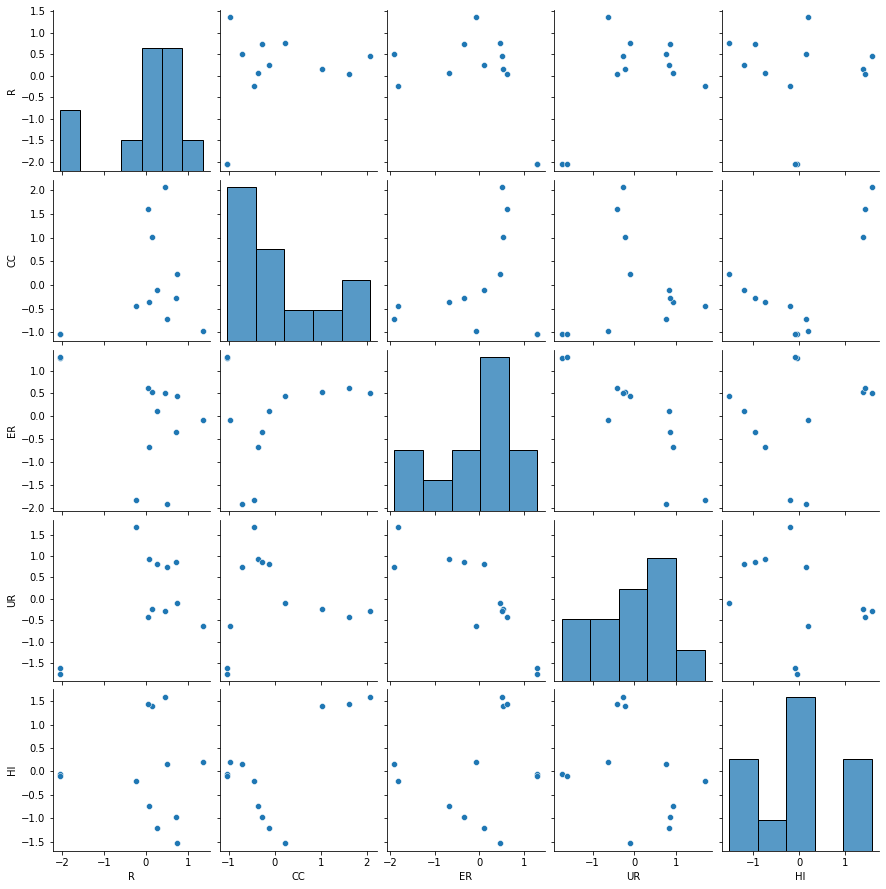

In [7]:
#%%check the quality of the dataset
print('quality of the dataset')
print(df.isna().any())
df.isna().any().to_csv('quality of the dataset.csv')
#%% check the correlation
print('check the correlation')
corr = df.corr()
print(corr)
sns.heatmap(corr, annot=True)
plt.savefig('correlation heatmap.png')
sns.pairplot(df)
plt.savefig('correlation pairplot.png')

## Creating the Regression Model

In [8]:
regr = linear_model.LinearRegression()
y = df['HI']
x = df[['R','CC','ER','UR']]

## Training the Model

In [9]:
regr.fit(x,y)
print('coefficients for R, CC, ER, UR are', regr.coef_)
print('intercept is    ', regr.intercept_)
print('linear regression expression is ')
print('HI = (', regr.coef_[0], ')*R+ (',regr.coef_[1],')*CC +(', regr.coef_[2], ')*ER +(', regr.coef_[3], ')*UR +', regr.intercept_)

coefficients for R, CC, ER, UR are [-0.20463687  0.9995171  -1.18577317 -1.26415495]
intercept is     -1.9757196172493126e-16
linear regression expression is 
HI = ( -0.20463686682910925 )*R+ ( 0.999517104561393 )*CC +( -1.1857731735686392 )*ER +( -1.2641549537186716 )*UR + -1.9757196172493126e-16


## Model Evaluation

evaluating model performance
0.7905967544454753


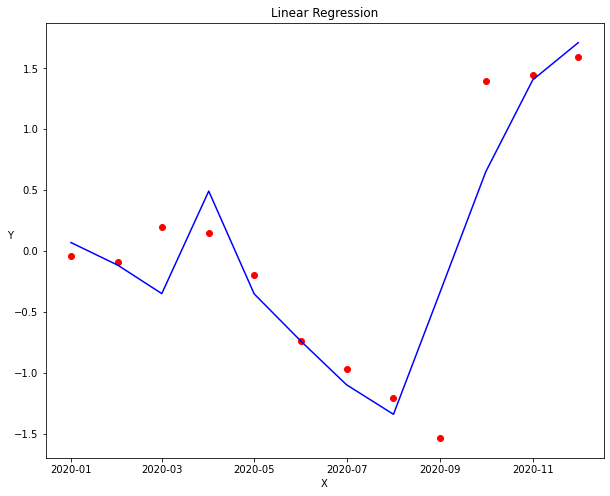

In [10]:
plt.figure(figsize=(10,8))
x1=df.index
plt.scatter(x1,y,color = 'red')
plt.plot(x1,regr.predict(x),color = 'blue')
plt.xlabel('X')
plt.ylabel('Y',rotation = 0)
plt.title("Linear Regression")
plt.savefig('Linear regression.png')
print('evaluating model performance')
print(r2_score(y, regr.predict(x)))